In [1]:
import sys
import numpy as np
import os
import utils
from matplotlib import pyplot as plt
from importlib import reload
import fig1
root = r'D:\Results\Zhong-et-al-2025'

In [34]:
reload(fig1)
reload(utils)

<module 'utils' from 'D:\\Codes\\zhong-et-al-2025\\utils.py'>

In [2]:
# load example lick raster
beh_path = os.path.join(root, 'beh')
example_behavior = np.load(os.path.join(beh_path, 'example_bef_and_aft_learning_behavior.npy'), allow_pickle=1).item()
aftLearn_lick_raster = utils.get_lick_raster(example_behavior['TX109_2023_04_14_1'])

# load before learning performance
beh0 = np.load(os.path.join(beh_path, 'Beh_sup_train1_before_learning.npy'), allow_pickle=1).item()
mean_beh_bef = utils.get_mean_lick_response(beh0, lick_typ='befRew')
# load after learning performance
beh1 = np.load(os.path.join(beh_path, 'Beh_sup_train1_after_learning.npy'), allow_pickle=1).item()
mean_beh_aft = utils.get_mean_lick_response(beh1, lick_typ='befRew')

In [3]:
# load distribution map of stimulus selective neurons
fns = ['sup_train1_before_learning_dprime_distribution.npy',
        'sup_train1_after_learning_dprime_distribution.npy',
        'unsup_train1_before_learning_dprime_distribution.npy',
        'unsup_train1_after_learning_dprime_distribution.npy']
img = [np.load(os.path.join(root, 'process_data', fn), allow_pickle=1).item() for fn in fns]
outlines = np.load(os.path.join(root, 'retinotopy/areas.npz'), allow_pickle = True)['out']
hotcmp = fig1.make_hot_cmap()

In [4]:
# load selective neurons fraction
fns = ['sup_train1_before_learning_dprime_frac.npy',
      'sup_train1_after_learning_dprime_frac.npy',
      'unsup_train1_before_learning_dprime_frac.npy',
      'unsup_train1_after_learning_dprime_frac.npy',
      'train1_before_grating_dprime_frac.npy',
      'train1_after_grating_dprime_frac.npy']
frac = [np.load(os.path.join(root, 'process_data', fn), allow_pickle=1).item() for fn in fns]

In [5]:
# load coding direction
fn = 'sup_test1_coding_direction.npy'
cd_proj = utils.load_coding_direction(os.path.join(root, 'process_data'), fn)
# load sorded spikes
fn = 'sup_test1_sort_spk.npy'
sort_spk = np.load(os.path.join(root, 'process_data', fn), allow_pickle=1).item()

coding direction of leaf1 - circle1


D:\Codes\zhong-et-al-2025\utils.py:233: RuntimeWarning: Mean of empty slice.
  resp_diff_u[m, a, s] = resp_diff[m, a, s].mean(0)
C:\Users\zhongl\AppData\Local\miniconda3\Lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Text(0.67, 0.44, '$\\bf{e}$ Summary of changes in leaf1-circle1 selective neurons')

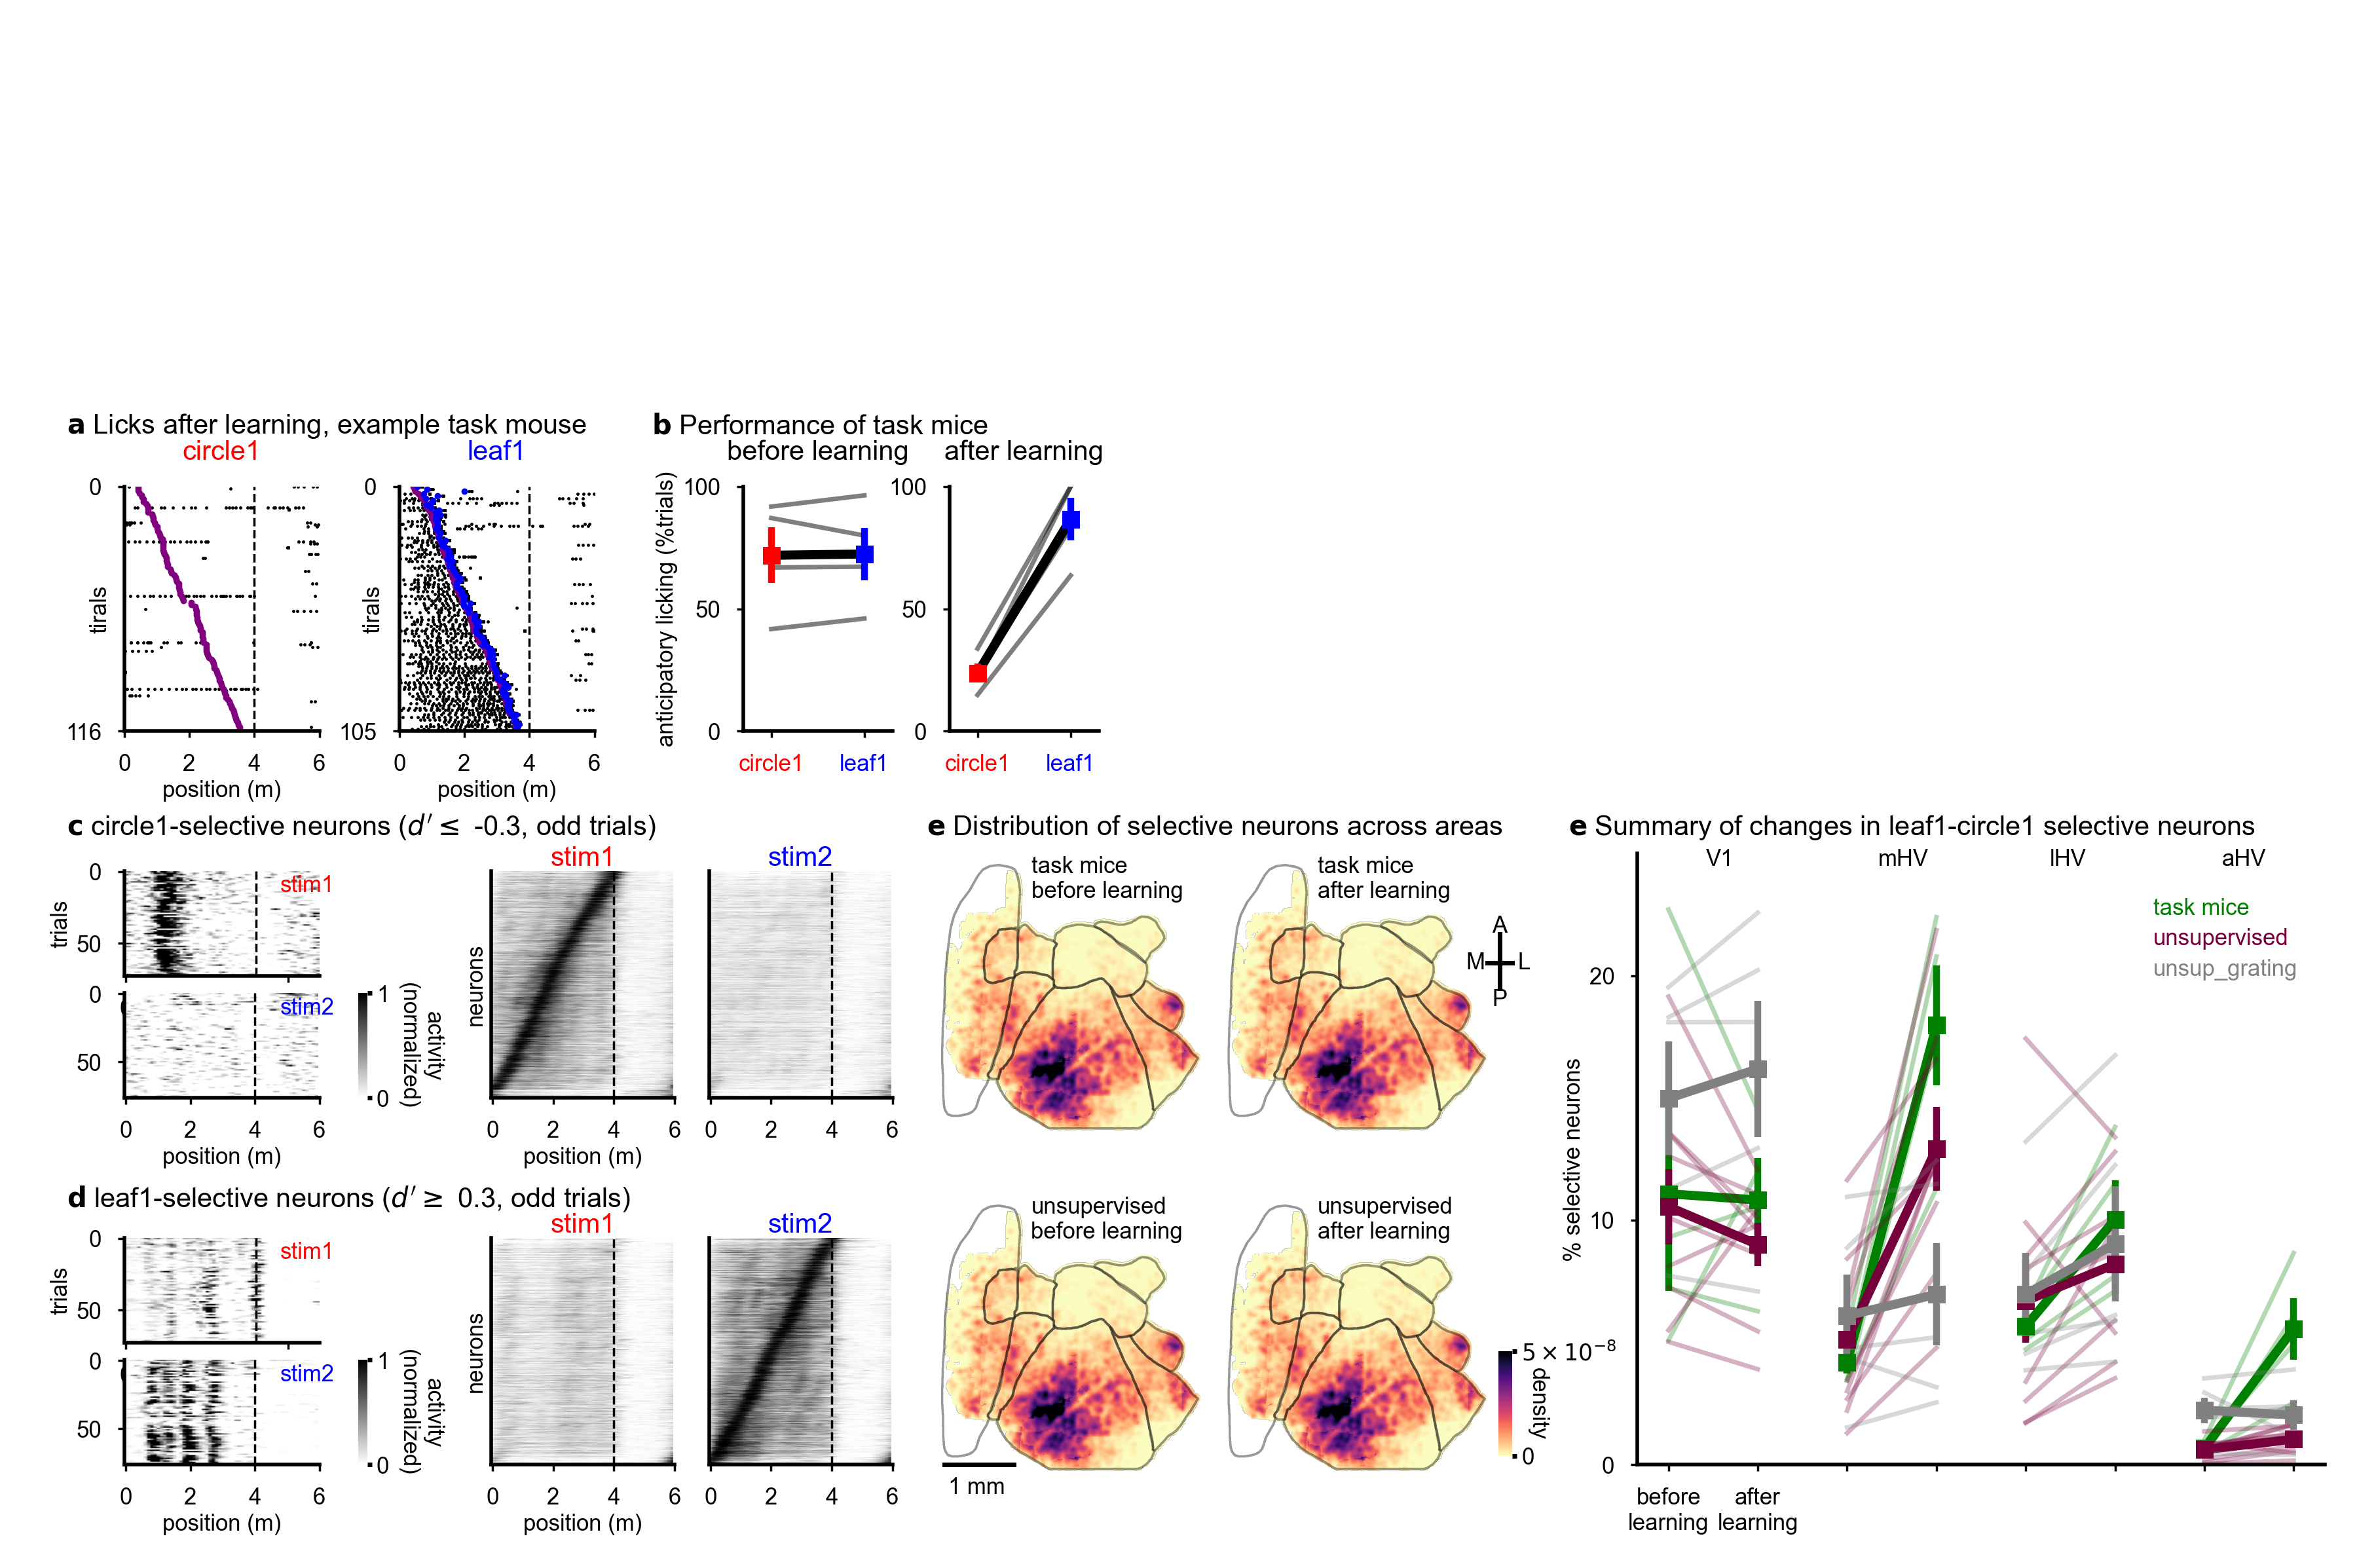

In [26]:
reload(fig1)
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(7, 8*7/10.5),dpi=500)


ax_text = fig.add_axes([0,0.18,1,0.82])
ax_text.set_facecolor('None')
ax_text.axis('off')

plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 5

# example lick raster
x,y, dx,dy, w,h =0.04,0.6, 0.12,0, 0.085,0.14
ax_circle = fig.add_axes([x,y,w,h])
fig1.lick_raster_plot(ax_circle, aftLearn_lick_raster['sort_by_cue']['circle1'], 
                      show_reward=1, show_firstLick=0, title='circle1', tcolor='r')

ax_leaf = fig.add_axes([x+dx,y,w,h])
fig1.lick_raster_plot(ax_leaf, aftLearn_lick_raster['sort_by_cue']['leaf1'], 
                      show_reward=1, show_firstLick=0, title='leaf1', tcolor='b')

# perfomance before vs after learning, train1
x,y, dx,dy, w,h =0.31,0.6, 0.09,0, 0.065,0.14
ax_bef_learning = fig.add_axes([x,y,w,h])
fig1.sup_perf_plot(ax_bef_learning, mean_beh_bef, title='before learning')  

ax_aft_learning = fig.add_axes([x+dx,y,w,h])
fig1.sup_perf_plot(ax_aft_learning, mean_beh_aft, title='after learning', yn=0)  

################## circle prefered single neurons  ######################
x,y, dx,dy, w,h =0.04,0.39, 0,0.07, 0.085,0.06
neuID = 27
axes = [fig.add_axes([x,y+dy,w,h]), fig.add_axes([x,y,w,h])]
fig1.plot_exampe_stimSel_single_neuron(axes, root=root, stim=0, neu_n=neuID, vmax=3)

cbar0= fig.add_axes([x+w*1.20,y-0.00,0.004,0.06])
fig1.cbar(cbar0, ticks=[0, 1], tickLabel=['', ''], cbarLabel='activity\n(normalized)',labelpad=12)

# ################## leaf prefered single neurons  ######################
x,y, dx,dy, w,h =0.04,0.18, 0,0.07, 0.085,0.06
neuID = 21
axes = [fig.add_axes([x,y+dy,w,h]), fig.add_axes([x,y,w,h])]
fig1.plot_exampe_stimSel_single_neuron(axes, root=root, stim=1, neu_n=neuID, vmax=3)

cbar1 = fig.add_axes([x+w*1.20,y-0.00,0.004,0.06])
fig1.cbar(cbar1, ticks=[0, 1], tickLabel=['', ''], cbarLabel='activity\n(normalized)',labelpad=12)

################## circle prefered all neurons  ######################
x,y, dx,dy, w,h =0.2,0.39, 0.095,0, 0.08,0.13
axes = [fig.add_axes([x,y,w,h]), fig.add_axes([x+dx,y,w,h])]
fig1.plot_exampe_stimSel_population(axes, root=root, stim=0)

# ################## leaf prefered all neurons  ######################
x,y, dx,dy, w,h =0.2,0.18, 0.095,0, 0.08,0.13
axes = [fig.add_axes([x,y,w,h]), fig.add_axes([x+dx,y,w,h])]
fig1.plot_exampe_stimSel_population(axes, root=root, stim=1)

# selective distribution map
x,y, dx,dy, w,h =0.37,0.165, 0.125,0.195, 0.17,0.17
axes_sup = [fig.add_axes([x,y+dy,w,h]), fig.add_axes([x+dx,y+dy,w,h])]
axes_unsup = [fig.add_axes([x,y,w,h]), fig.add_axes([x+dx,y,w,h])]

a, b, n =5, 10, 8
vmax = a/(b**n) # i.e. 5x10e-8

fig1.distribution_map(axes_sup[0], img[0]['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=0)
axes_sup[0].text(0.35, 0.85, 'task mice\nbefore learning', transform=axes_sup[0].transAxes)

fig1.distribution_map(axes_sup[1], img[0]['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=0)
axes_sup[1].text(0.35, 0.85, 'task mice\nafter learning', transform=axes_sup[1].transAxes)

fig1.distribution_map(axes_unsup[0], img[0]['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=1)
axes_unsup[0].text(0.35, 0.85, 'unsupervised\nbefore learning', transform=axes_unsup[0].transAxes)
axes_unsup[0].text(0.07, -0.01, '1 mm', transform=axes_unsup[0].transAxes)

fig1.distribution_map(axes_unsup[1], img[0]['img'], outlines, cmp=hotcmp, vmax=vmax, scalbar=0)
axes_unsup[1].text(0.35, 0.85, 'unsupervised\nafter learning', transform=axes_unsup[1].transAxes)

cbar2 = fig.add_axes([x+dx+w*0.85,y+0.02,0.006,0.06])
fig1.cbar(cbar2, cmap=hotcmp, tickLabel=[0, r'$5\times10^{-8}$'], cbarLabel='density', ticks=[0, 1], labelpad=-15)

ax_coord = fig.add_axes([x+2.1*dx,y+0.285,0.015,0.035])
fig1.brain_coordinate(ax_coord)
################## significant fraction  ######################
x,y, w,h =0.7,0.18, 0.3,0.35
ax_frac = fig.add_axes([x, y, w, h])
fig1.plot_frac(ax_frac, frac[0]['value'][:, :, 2, 0], frac[1]['value'][:, :, 2, 0], col='g')
fig1.plot_frac(ax_frac, frac[2]['value'][:, :, 2, 0], frac[3]['value'][:, :, 2, 0], col=[0.46,0,0.23])
fig1.plot_frac(ax_frac, frac[4]['value'][:, :, 2, 0], frac[5]['value'][:, :, 2, 0], col='0.5')

ax_frac.text(0.75, 0.9, 'task mice', color='g', transform=ax_frac.transAxes)
ax_frac.text(0.75, 0.85, 'unsupervised', color=[0.46,0,0.23], transform=ax_frac.transAxes)
ax_frac.text(0.75, 0.8, 'unsup_grating', color='0.5', transform=ax_frac.transAxes)
for t,txt in enumerate(['V1', 'mHV', 'lHV', 'aHV']):
    ax_frac.text(0.1 + 0.25*t, 0.98, txt, transform=ax_frac.transAxes)

ax_text.text(0.015, 0.72, r'$\bf{a}$ Licks after learning, example task mouse', fontsize=6)
ax_text.text(0.27, 0.72, r'$\bf{b}$ Performance of task mice', fontsize=6)
ax_text.text(0.015, 0.44, r"$\bf{c}$ circle1-selective neurons ($d' \leq$ -0.3, odd trials)", fontsize=6)
ax_text.text(0.015, 0.18, r"$\bf{d}$ leaf1-selective neurons ($d' \geq$ 0.3, odd trials)", fontsize=6)

ax_text.text(.39, .44, r"$\bf{e}$ Distribution of selective neurons across areas", fontsize=6)
ax_text.text(0.67, 0.44, r"$\bf{e}$ Summary of changes in leaf1-circle1 selective neurons", fontsize=6)

